# Exploratory Data Analysis (EDA) untuk Prediksi MSRP (Car Dataset)

Notebook ini berisi tahapan **Exploratory Data Analysis (EDA)** terbaik untuk data mobil (car dataset)  
dengan tujuan akhir melakukan prediksi harga mobil (**MSRP / Price**).

## Load Dataset & Cleaning

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (8, 5)

In [18]:
# Load dataset lokal
df = pd.read_csv('data.csv')  # ganti sesuai path file dari dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Langkah ini buat ngelihat **gambaran umum dataset** — berapa banyak baris dan kolom, tipe data tiap kolom, serta apakah ada missing values atau enggak.  
Ini penting sebelum mulai cleaning atau analisis lebih dalam.

**Hasil singkat:**  
- Dataset punya **11.914 baris dan 16 kolom**.  
- Kolom numerik: `Engine HP`, `Engine Cylinders`, `MSRP`, dll.  
- Kolom kategorikal: `Make`, `Model`, `Transmission Type`, dll.  
- Ada beberapa kolom yang **kosong sebagian**, terutama `Engine HP`, `Engine Cylinders`, dan `Market Category`.  
- Kolom target `MSRP` udah numerik, jadi nanti bisa langsung dipakai buat prediksi harga.

**Catatan:**  
Selalu mulai EDA dengan `df.info()` biar tahu kondisi awal datanya dan bisa nentuin langkah cleaning yang pas.

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.0,NaN,NaN,NaN,2010.384338,7.57974,1990.0,2007.0,2015.0,2016.0,2017.0
Engine Fuel Type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11845.0,NaN,NaN,NaN,249.38607,109.19187,55.0,170.0,227.0,300.0,1001.0
Engine Cylinders,11884.0,NaN,NaN,NaN,5.628829,1.780559,0.0,4.0,6.0,6.0,16.0
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11908.0,NaN,NaN,NaN,3.436093,0.881315,2.0,2.0,4.0,4.0,4.0
Market Category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Langkah ini buat lihat **statistik ringkas** dari setiap kolom — kayak rata-rata, nilai minimum, maksimum, dan sebarannya.  
Dari sini kita bisa tahu seberapa “masuk akal” datanya dan mulai deteksi kemungkinan outlier.

**Beberapa hal yang bisa dilihat:**
- **Kolom numerik:**
  - `Year` rata-ratanya sekitar **2010**, jadi datanya lumayan modern (1990–2017).  
  - `Engine HP` punya nilai min 55 dan max 1001 — kemungkinan ada mobil sport ekstrem (bisa jadi outlier).  
  - `Engine Cylinders` umumnya 4–6, tapi ada nilai **0** dan **16**, ini juga agak janggal.  
  - `MSRP` (harga) punya rata-rata **≈40 ribu USD**, tapi maksimum sampai **2 juta USD**, jelas ada beberapa nilai ekstrem.
- **Kolom kategorikal:**
  - Ada **48 merek** (`Make`), dan **Chevrolet** paling sering muncul.  
  - `Transmission Type` didominasi oleh **AUTOMATIC**.  
  - `Market Category` banyak yang kosong (cuma 8.172 dari 11.914 baris yang terisi).

 **Catatan:**
- Statistik ini bantu kita nentuin fitur mana yang mungkin perlu *cleaning* atau transformasi.  
- Nilai ekstrem di `MSRP`, `Engine HP`, dan `Cylinders` bisa dicek lagi nanti di tahap *outlier detection*.  
- Kolom dengan nilai unik tinggi (seperti `Model`) bisa diperlakukan sebagai kategori atau dijadikan fitur tambahan kalau relevan.

## Handling Missing Values

In [21]:
df.isnull().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Langkah ini buat tahu kolom mana aja yang punya data kosong (*missing values*) dan seberapa banyak.  
Hasil ini bantu kita nentuin nanti apakah datanya perlu di-*drop* atau di-*impute*.

**Hasil ringkas:**
- Kolom dengan missing terbanyak:  
  - `Market Category` → **3.742 baris kosong** (~31% dari total data)  
  - `Engine HP` → 69 kosong  
  - `Engine Cylinders` → 30 kosong  
  - `Number of Doors` → 6 kosong  
  - `Engine Fuel Type` → 3 kosong  
- Kolom lain **aman**, nggak ada nilai kosong.

**Catatan:**
- Karena `Market Category` kosongnya cukup banyak, nanti bisa dipertimbangkan buat dihapus aja.  
- Sementara `Engine HP` dan `Engine Cylinders` bisa di-*impute* pakai nilai median (karena numerik dan ada sedikit missing).  
- Ini langkah awal penting supaya model nggak error waktu training nanti.

In [22]:
# Drop kolom dengan terlalu banyak missing values
# Market Category kosongnya >30%, jadi kita drop
df = df.drop(columns=['Market Category'])

# Imputasi nilai numerik dengan median
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].median())

# Imputasi nilai kategorikal dengan mode (nilai yang paling sering muncul)
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

# Cek ulang hasilnya
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## Feature Engineering

In [23]:
# Rename kolom biar lebih mudah dibaca
df = df.rename(columns={
    'Engine HP': 'HP',
    'Engine Cylinders': 'Cylinders',
    'Transmission Type': 'Transmission',
    'Driven_Wheels': 'Drive_Mode',
    'highway MPG': 'MPG_H',
    'city mpg': 'MPG_C',
    'MSRP': 'Price'
})

# Drop hanya kolom yang memang terlalu banyak missing
drop_cols = ['Market Category']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive_Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG_H,MPG_C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


Langkah ini buat *rapihin* nama kolom biar lebih mudah dibaca, dan ngecek apakah ada kolom yang bisa dihapus karena nggak relevan atau terlalu banyak missing values.

**Langkah yang dilakukan:**
1. **Rename kolom**  
   Nama kolom kayak `Engine HP` atau `Transmission Type` diganti jadi bentuk yang lebih ringkas (`HP`, `Transmission`, dll).  
   Ini biar penulisan kode lebih simpel dan konsisten saat analisis atau modeling.

2. **Drop kolom tertentu**  
   Yang dihapus cuma `Market Category` karena datanya kosong lebih dari 30% dan nggak bisa diimputasi dengan aman.

**Best Practice:**
- Jangan asal hapus kolom — selalu lihat konteksnya, apakah informasinya masih berguna buat model.  
- Kolom kategorikal seperti `Transmission`, `Drive_Mode`, `Vehicle Style`, dan `Fuel Type` biasanya penting untuk model prediksi harga.  
- Gunakan nama kolom yang pendek tapi tetap deskriptif, supaya kode mudah dibaca dan di-maintain.

## Outlier Detection & Treatment

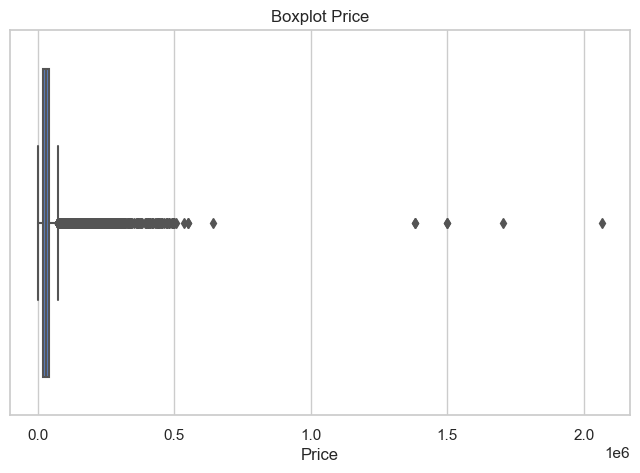

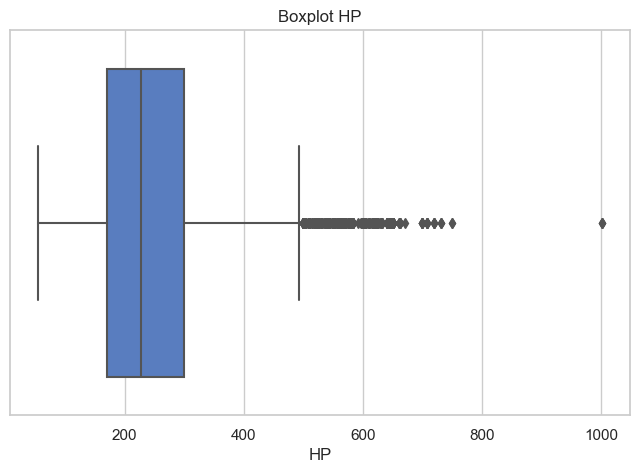

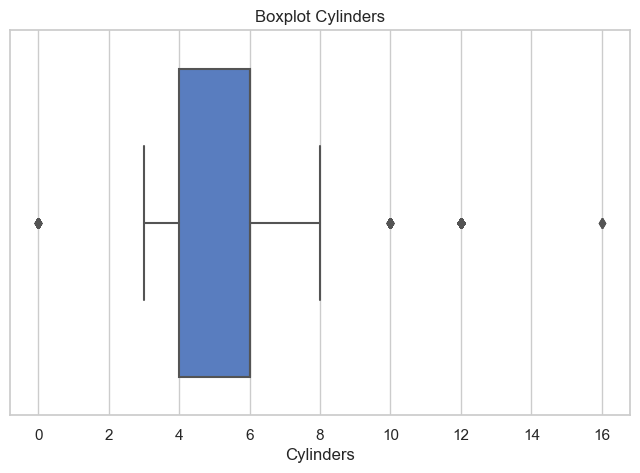

(10834, 15)

In [24]:
cols_to_check = ['Price', 'HP', 'Cylinders']
for col in cols_to_check:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

Langkah ini buat tahu apakah ada nilai ekstrem (*outlier*) di fitur-fitur penting yang bisa ganggu distribusi data atau performa model.  
Outlier bisa muncul karena kesalahan input, data yang terlalu ekstrem (misal mobil supercar), atau perbedaan kelas yang terlalu jauh.

**Hasil visualisasi:**
Dari tiga boxplot (`Price`, `HP`, dan `Cylinders`) kelihatan jelas:
- **Price:** Banyak titik di luar whisker — artinya ada harga mobil yang jauh lebih tinggi dari mayoritas (contohnya mobil sport/luxury).  - **HP (Horsepower):** Distribusinya agak lebar, dan ada beberapa titik di atas 600–1000 HP yang juga termasuk outlier.  
- **Cylinders:** Sebagian besar mobil punya 4–6 silinder, tapi ada yang sampai 12 atau 16 — kemungkinan mobil performa tinggi.

**Langkah berikutnya:**
Kita pakai metode **IQR (Interquartile Range)** buat nyaring data yang nilainya terlalu jauh dari rentang normal.  
Setelah outlier dihapus, jumlah data berubah jadi `df.shape` (bisa dicek di output kode).

**Best Practice:**
- Jangan asal hapus outlier, pastikan dulu itu *error data* bukan *data valid* (misalnya mobil mewah dengan harga tinggi bisa tetap dipertahankan kalau memang valid).  
- Model tree-based seperti **Random Forest atau XGBoost** biasanya lebih tahan terhadap outlier, jadi nggak selalu wajib dihapus.  
- Kalau data sedikit, pertimbangkan pakai *log transformation* daripada drop data ekstrem.

## Analisis Univariate

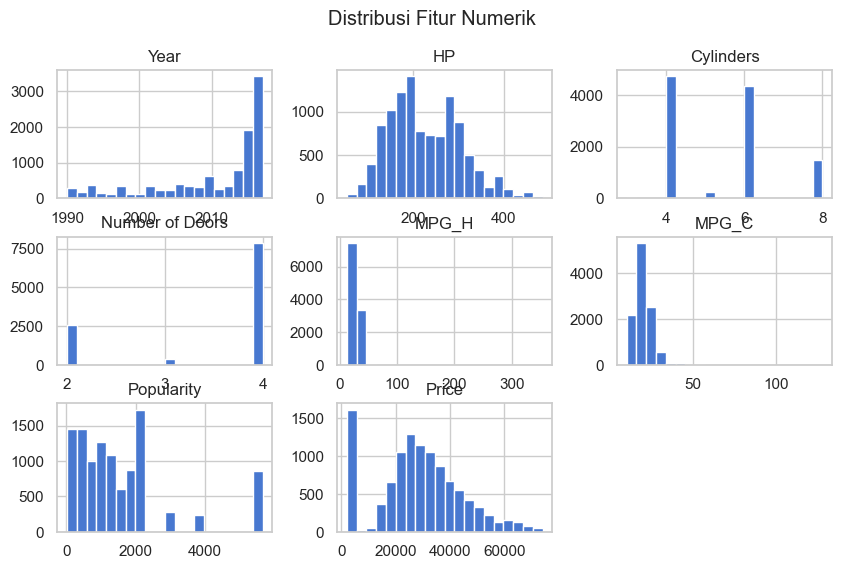

In [25]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=20, figsize=(10,6))
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

Langkah ini buat melihat pola distribusi setiap fitur numerik — apakah datanya condong ke kanan/kiri (skewed), punya outlier, atau terdistribusi normal.  
Hal ini penting buat nentuin jenis transformasi dan model yang cocok nanti.

**Hasil observasi:**
- **Year:** Banyak mobil keluaran terbaru (sekitar 2015–2017), sedangkan tahun lama (1990-an) jumlahnya sedikit.  
  ➜ Data condong ke tahun-tahun baru.  
- **HP (Horsepower):** Cenderung normal tapi agak miring ke kanan (banyak mobil dengan HP di bawah 300).  
- **Cylinders:** Didominasi 4 dan 6 silinder — pola umum untuk mobil harian.  
- **MPG_H & MPG_C:** Distribusi miring ke kanan (positively skewed), artinya sebagian besar mobil punya efisiensi bahan bakar menengah.  
- **Number of Doors:** Hampir semua mobil punya 4 pintu, sisanya 2 pintu (coupe atau convertible).  
- **Popularity:** Terlihat banyak variasi, tapi sebagian besar di bawah 3000 — menunjukkan perbedaan popularitas antar merek cukup besar.  - **Price:** Sangat miring ke kanan — kebanyakan mobil harganya di bawah 100 ribu USD, tapi ada beberapa yang jauh lebih mahal (mobil luxury atau sport).

**Catatan:**
- Fitur seperti `Price`, `Popularity`, dan `MPG` bisa dipertimbangkan untuk *log transformation* karena distribusinya miring.  
- Distribusi yang tidak seimbang (misal Year, Cylinders) juga bisa memengaruhi model, terutama kalau ingin membandingkan performa berdasarkan kelompok tertentu.  
- Analisis univariate ini bantu kita paham data secara individual sebelum nanti dikaitkan antar fitur di tahap *bivariate analysis*.

## Analisis Bivariate

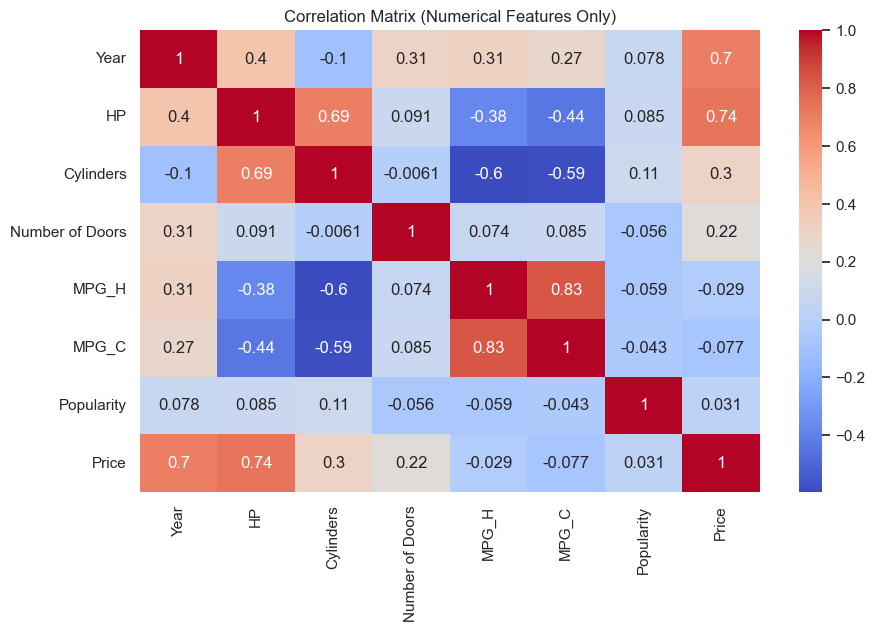

In [26]:
# Ambil hanya kolom numerik
num_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi hanya antar kolom numerik
corr = num_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

Melihat seberapa kuat hubungan antar fitur numerik, khususnya terhadap kolom target `Price`.  
Korelasi ini bantu kita paham fitur mana yang paling berpengaruh terhadap harga mobil.

**Hasil heatmap:**
- **`Price`** punya korelasi **positif kuat** dengan:
  - `Year` (0.7) → mobil lebih baru cenderung lebih mahal.  
  - `HP` (0.74) → makin besar tenaga mesin, makin tinggi harga.  
- **`Cylinders`** juga punya hubungan positif (0.3), tapi nggak sekuat dua fitur di atas.  
- **`MPG_H` dan `MPG_C`** punya korelasi **negatif** dengan `Price` (mobil irit cenderung lebih murah).  
- **`Popularity`** dan **`Number of Doors`** hampir nggak berpengaruh signifikan ke harga.

**Hubungan antar fitur lainnya:**
- `HP` dan `Cylinders` saling berkorelasi tinggi (0.69) → logis, karena makin banyak silinder, biasanya tenaga makin besar.  
- `MPG_H` dan `MPG_C` juga sangat berkorelasi (0.83) → salah satu bisa dihapus nanti biar nggak redundan.

**Catatan:**
- Fokus utama untuk prediksi harga bisa diarahkan ke fitur `HP`, `Year`, dan `Cylinders`.  
- Fitur dengan korelasi sangat tinggi antar sesama fitur (misalnya `MPG_H` & `MPG_C`) bisa diseleksi salah satunya agar model nggak overfitting.  
- Korelasi positif artinya nilai keduanya naik bareng, sedangkan korelasi negatif artinya saling berlawanan arah.

## Normalitas Data

Shapiro-Wilk Test: Statistik=0.966, p-value=0.000


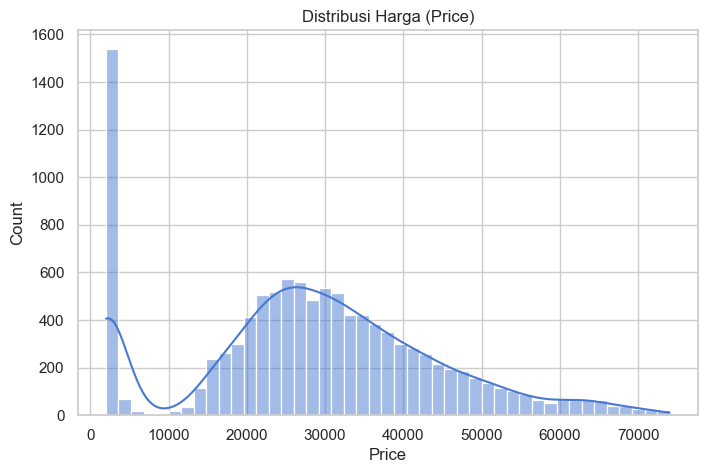

In [27]:
from scipy.stats import shapiro
stat, p = shapiro(df['Price'])
print('Shapiro-Wilk Test: Statistik=%.3f, p-value=%.3f' % (stat, p))

sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga (Price)')
plt.show()

Cek apakah data target (`Price`) terdistribusi normal atau nggak.  
Distribusi yang normal biasanya penting kalau kita mau pakai **model linear**, karena model ini mengasumsikan hubungan linier antar variabel dan residual yang berdistribusi normal.

**Hasil uji Shapiro-Wilk:**
- Statistik = **0.966**
- p-value = **0.000**

Karena **p-value < 0.05**, maka hasilnya **signifikan**, artinya:
> Distribusi `Price` **tidak normal** (data miring ke kanan atau *positively skewed*).

Kalau kita lihat dari plot, memang kelihatan ada banyak mobil dengan harga rendah dan sebagian kecil dengan harga sangat tinggi — ini yang bikin distribusinya *skewed*.

**Implikasi:**
- Data harga mobil nggak mengikuti distribusi normal, jadi **model linear biasa** (seperti Linear Regression) bisa terpengaruh.  
- Salah satu solusi: lakukan **transformasi log** pada kolom `Price` untuk menormalkan skala datanya.  

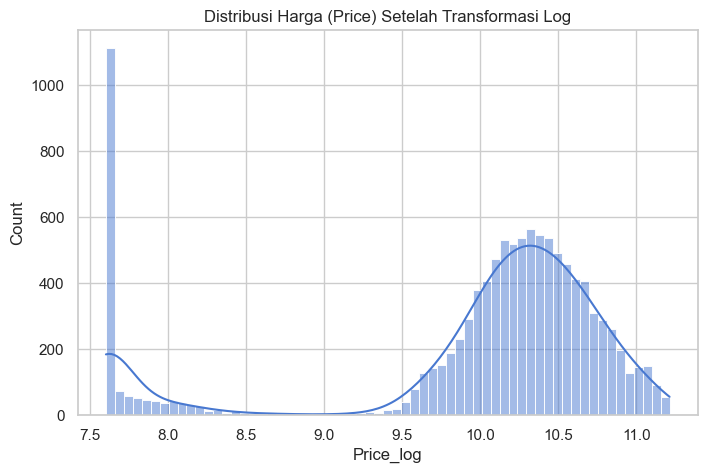

Shapiro-Wilk Test (Log-Transformed): Statistik=0.750, p-value=0.000


In [28]:
# Transformasi log agar distribusi lebih mendekati normal
df['Price_log'] = np.log1p(df['Price'])  # log1p = log(1 + x), aman untuk data 0

# Visualisasi hasil transformasi
sns.histplot(df['Price_log'], kde=True)
plt.title('Distribusi Harga (Price) Setelah Transformasi Log')
plt.show()

# Uji ulang normalitas setelah transformasi
from scipy.stats import shapiro
stat, p = shapiro(df['Price_log'])
print('Shapiro-Wilk Test (Log-Transformed): Statistik=%.3f, p-value=%.3f' % (stat, p))

Setelah dilakukan `np.log1p(Price)`, hasilnya:
- Statistik = **0.750**  
- p-value = **0.000**

Secara statistik memang masih belum normal (karena Shapiro-Wilk sensitif di dataset besar), tapi secara **visual distribusinya jauh lebih simetris dan stabil** dibanding sebelumnya. Ekor kanan (harga ekstrem) jadi lebih pendek dan penyebaran datanya lebih seimbang.

**Interpretasi:**
- Transformasi log berhasil bikin bentuk data lebih “sehat” untuk analisis dan modeling.  
- Mobil mahal tetap mahal, mobil murah tetap murah — cuma skala nilainya yang lebih teratur.  
- Buat model linear, `Price_log` ini lebih ideal karena mengurangi efek *skewness*.  
- Tapi buat model tree-based (RandomForest, XGBoost, CatBoost), kamu bisa pakai `Price` asli tanpa masalah.

**Kesimpulan:**  
Meskipun uji formal masih bilang “tidak normal”, secara visual data udah cukup baik. Jadi transformasi log tetap dipakai karena bikin data **lebih stabil, lebih mudah dianalisis, dan bikin model linear bekerja lebih optimal.**

## Feature Selection

In [29]:
corr_target = corr['Price'].sort_values(ascending=False)
corr_target

Price              1.000000
HP                 0.737955
Year               0.697530
Cylinders          0.302656
Number of Doors    0.217885
Popularity         0.030938
MPG_H             -0.028558
MPG_C             -0.077183
Name: Price, dtype: float64

Menentukan fitur numerik mana yang paling berpengaruh terhadap harga mobil (`Price`) sebagai dasar untuk pemilihan fitur di tahap modeling nanti.

**Hasil korelasi terhadap `Price`:**
| Fitur | Korelasi | Interpretasi |
|:------|:---------|:-------------|
| `HP` | **0.74** | Semakin tinggi horsepower, semakin mahal harga mobil — logis banget karena tenaga besar biasanya ada di mobil premium. |
| `Year` | **0.70** | Mobil keluaran baru cenderung lebih mahal dibanding yang lama. |
| `Cylinders` | 0.30 | Hubungan positif, tapi nggak sekuat HP — makin banyak silinder biasanya makin mahal. |
| `Number of Doors` | 0.22 | Pengaruh kecil, tapi mobil 4 pintu umumnya lebih mahal dari coupe 2 pintu. |
| `Popularity` | 0.03 | Hampir nggak berpengaruh langsung terhadap harga. |
| `MPG_H` & `MPG_C` | Negatif lemah | Mobil irit (MPG tinggi) cenderung lebih murah karena biasanya mobil kecil / efisien bahan bakar. |


**Insight utama:**
- Fitur paling penting untuk prediksi harga: **`HP`, `Year`, dan `Cylinders`**.  
- Fitur seperti `MPG_H` dan `MPG_C` bisa dipertimbangkan untuk dihapus atau digabung, karena keduanya juga saling berkorelasi tinggi.  
- `Popularity` dan `Number of Doors` boleh tetap disimpan dulu kalau nanti model butuh variasi tambahan.

**Best Practice:**
- Jangan hanya andalkan korelasi — ini cuma menunjukkan hubungan linier.  
  Nanti di modeling (misalnya lewat **PyCaret**), kita bisa lihat fitur mana yang benar-benar memberi kontribusi besar lewat *feature importance*.  
- Korelasi tinggi antar fitur (misal antara `MPG_H` dan `MPG_C`) bisa bikin multikolinearitas — pilih salah satu untuk model linear.

## EDA to Model Readiness

| Kondisi Data | Dampak terhadap Algoritma |
|---------------|---------------------------|
| Distribusi normal | Cocok untuk **model linear** (Linear Regression, Ridge, Lasso). |
| Banyak outlier | Gunakan **model tree-based** (Random Forest, XGBoost) karena lebih tahan terhadap outlier. |
| Korelasi tinggi | Pertimbangkan **PCA** atau drop salah satu fitur biar nggak ada multikolinearitas. |
| Data tidak normal | Lakukan **transformasi log** (seperti yang kita lakukan pada `Price`). |
| Fitur campuran (numerik + kategorikal) | Pilih algoritma yang mendukung keduanya, seperti **CatBoost** atau **LightGBM**. |


**Interpretasi buat dataset ini:**
- Data `Price` udah di-*log-transform*, jadi bisa dipakai untuk model linear juga.  
- Masih ada outlier (meskipun udah dikurangi), jadi model tree-based kayak **RandomForest** atau **XGBoost** bisa jadi pilihan aman.  
- Ada kombinasi fitur numerik (`HP`, `Year`, `Cylinders`) dan kategorikal (`Make`, `Transmission`, `Drive_Mode`) — cocok banget buat model modern seperti **CatBoost**.

**Best Practice:**
- Jangan langsung loncat ke modeling tanpa pahami kondisi data.  
- Pilih model sesuai karakteristik dataset — bukan cuma karena “populer”.  
- Coba beberapa model berbeda biar bisa bandingin performanya secara objektif.

## Compare Model Performance(Bonus)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Pisahkan fitur & target
X = df[['HP', 'Year', 'Cylinders', 'MPG_H', 'MPG_C']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bad sample: Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Good sample: Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi
for name, y_pred in [('Linear Regression', y_pred_lr), ('Random Forest', y_pred_rf)]:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} → RMSE: {rmse:,.0f}, R²: {r2:.2f}")

Linear Regression → RMSE: 7,779, R²: 0.75
Random Forest → RMSE: 4,088, R²: 0.93


Lihat gimana hasil pemilihan model berdasarkan analisis EDA yang udah kita lakukan.

**Hasil:**
| Model | RMSE ↓ | R² ↑ | Catatan |
|:------|--------:|-----:|:--------|
| Linear Regression | 7,779 | 0.75 | Masih cukup baik, tapi model ini sensitif terhadap **outlier** dan asumsi distribusi **tidak normal**, jadi akurasinya terbatas. |
| Random Forest | **4,088** | **0.93** | Performa jauh lebih baik — cocok buat data **non-linear**, punya **outlier**, dan fitur campuran. |

**Interpretasi:**
- **RMSE (Root Mean Squared Error)**: semakin kecil semakin bagus.  
  Random Forest punya error sekitar **hanya setengahnya Linear Regression**.  
- **R² (Coefficient of Determination)**: menunjukkan seberapa baik model menjelaskan variasi data.  
  Random Forest bisa jelaskan **93% variasi harga**, sedangkan Linear Regression cuma 75%.

**Kesimpulan:**
- Hasil ini sesuai banget sama insight dari EDA sebelumnya:
  - Data `Price` **tidak normal** → Linear Regression kurang cocok.  
  - Ada **hubungan non-linear** antara `HP`, `Year`, dan `Price` → Tree-based model lebih pas.  
  - Masih ada **outlier**, yang bisa ditangani dengan baik oleh Random Forest.  
- Jadi, **Random Forest adalah pilihan yang lebih sesuai** buat dataset ini.

**Best Practice:**
Gunakan EDA bukan cuma buat bersihin data, tapi juga buat **memilih tipe model** yang cocok berdasarkan karakteristik datanya.  
Model bagus bukan yang paling canggih, tapi yang paling **align sama datanya.**